In [1]:
"""Critical Value analysis"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

matplotlib.rcParams['font.family'] = "monospace"

%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [11]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [4]:
basic = [
    "critical_values_results_basic_j12_s2_0",
    "critical_values_results_basic_j15_s2_0",
    "critical_values_results_basic_j15_s3_0",
    "critical_values_results_basic_j25_s5_0"
]

paper = [
    "flexible_auction_fog_j15_s3_0",
    "flexible_auction_fog_j25_s5_0"
]

In [5]:
encoded_filenames = paper
folder = "paper"

In [6]:
"""Algorithm Total price"""
data = []
model_names: List[str] = []
test_name: str = ""

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        critical_value_data = json.load(file)

        for pos, result in enumerate(critical_value_data):
            best_total_money = max(r['total money'] for r in result.values())
            
            for algorithm_name, critical_value_result in result.items():
                if algorithm_name == "VCG" or algorithm_name == "Fixed VCG":
                    data.append((model_name, pos, algorithm_name, 
                                 critical_value_result['total money'],
                                 critical_value_result['total money'] / best_total_money,
                                 "", "", "", critical_value_result['solve_time']))
                else:
                    data.append((model_name, pos, algorithm_name,
                                 critical_value_result['total money'],
                                 critical_value_result['total money'] / best_total_money,
                                 critical_value_result['value_density'],
                                 critical_value_result['server_selection_policy'],
                                 critical_value_result['resource_allocation_policy'],
                                 critical_value_result['solve_time']))

df = pd.DataFrame(data, columns=['Model', 'Pos', 'Algorithm Name', 'Total Money', 'Best Total Money', 
                                 'Value Density', 'Server Selection Policy',
                                 'Resource Allocation Policy', 'Solve Time'])

c:\users\mark\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


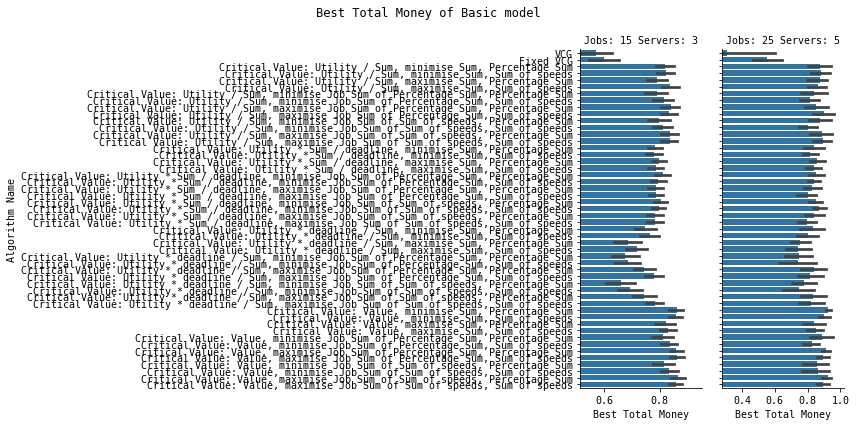

In [7]:
g = sns.FacetGrid(df, col='Model', height=6, sharex=False)
g = g.map(sns.barplot, 'Best Total Money', 'Algorithm Name').set_titles("{col_name}")

for pos, model in enumerate(model_names):
    values = [np.mean(df[(df['Model'] == model) & (df['Algorithm Name'] == algo)]['Best Total Money'])
              for algo in df['Algorithm Name'].unique()]
    g.axes[0, pos].set_xlim(min(values) * 0.9, max(values) * 1.1)
    
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle("{} of {} model".format('Best Total Money', 'Basic'))

g

In [8]:
shortened_df = df[(df['Algorithm Name'] == 'VCG') | 
                  (df['Algorithm Name'] == 'Fixed VCG') | 
                  (df['Algorithm Name'] == 'Critical Value: Utility / Sum, minimise Sum, Percentage Sum')].replace('Critical Value: Utility / Sum, minimise Sum, Percentage Sum', 'Critical Value Auction')

shortened_df

,Model,Pos,Algorithm Name,Total Money,Best Total Money,Value Density,Server Selection Policy,Resource Allocation Policy,Solve Time
0,Jobs: 15 Servers: 3,0,VCG,183.000,0.370195,,,,180.429
1,Jobs: 15 Servers: 3,0,Fixed VCG,486.000,0.983141,,,,195.306
2,Jobs: 15 Servers: 3,0,Critical Value Auction,461.420,0.933417,Utility / Sum,minimise Sum,Percentage Sum,6.227
50,Jobs: 15 Servers: 3,1,VCG,284.000,0.610722,,,,165.357
51,Jobs: 15 Servers: 3,1,Fixed VCG,126.000,0.270954,,,,57.220
...,...,...,...,...,...,...,...,...,...
3751,Jobs: 25 Servers: 5,6,Fixed VCG,329.000,0.513619,,,,255.718
3752,Jobs: 25 Servers: 5,6,Critical Value Auction,640.553,1.000000,Utility / Sum,minimise Sum,Percentage Sum,13.694
3800,Jobs: 25 Servers: 5,7,VCG,560.000,0.823872,,,,270.974
3801,Jobs: 25 Servers: 5,7,Fixed VCG,314.000,0.461957,,,,255.720


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: ../figures/price_change/png/simple_total_money.png
Save file location: ../figures/price_change/eps/simple_total_money.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


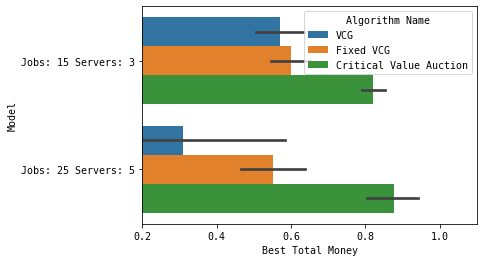

In [15]:
g = sns.barplot(y='Model', x='Best Total Money', hue='Algorithm Name', ci=95, data=shortened_df)
g.set_xlim(0.2, 1.1)

save_plot(analysis_filename('simple', 'total_money'), "price_change", image_formats=[ImageFormat.PNG, ImageFormat.EPS])

In [ ]:
data = []
model_names: List[str] = []
test_name: str = ""

encoded_filename = encoded_filenames[-1]
filename, model_name, test_name = decode_filename(folder, encoded_filename)
model_names.append(model_name)
    
with open(filename) as file:
    critical_value_data = json.load(file)

    for pos, result in enumerate(critical_value_data):
        for algorithm_name, critical_value_result in result.items():
            for job_name, job_price in critical_value_result['prices'].items():
                if algorithm_name == 'price change 3':
                    data.append((pos, 'Iterative Auction', job_name, job_price))
                else:
                    data.append((pos, algorithm_name, job_name, job_price))
                
df = pd.DataFrame(data, columns=['Pos', 'Algorithm Name', 'Job Name', 'Job Price'])
df

In [ ]:
g = sns.FacetGrid(df, col='Pos',col_wrap=5, sharex=False, hue='Job Name')
g = g.map(sns.scatterplot, 'Job Price', 'Algorithm Name')
g.set_titles('{col_name}').add_legend()

g